# Deep learning for mortality prediction
## We're going to implement a model in keras to predict mortality
## Visualize the results obtained

### Importing necessary libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import os
sns.set()
# Access data.
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Using TensorFlow backend.


In [ ]:
oversample = SMOTE()
scaler = StandardScaler()

### Uploading the dataset 

In [ ]:
uploaded = files.upload()

Saving rawdata.csv to rawdata.csv


In [ ]:
import io
icudata = pd.read_csv(io.BytesIO(uploaded['rawdata.csv']))

In [ ]:
icudata

,age,height,weight,eyes,motor,verbal,GCSTotal,temperature,respiratoryrate,heartrate,glucose,O2,fio2,ph,los,SBP,DBP,MAP,ethnicity,gender,hosp_alive,icu_alive
0,81.0,165.1,61.70,4.0,6.0,5.0,15.0,34.8,5.0,114.0,185.0,95.0,60.0,7.390,10.893056,103.366634,55.650501,71.555879,1.0,1,0,0
1,59.0,180.3,92.30,4.0,6.0,5.0,15.0,37.2,10.0,114.0,121.0,98.0,21.0,6.700,10.679861,132.334862,57.155963,82.215596,1.0,0,0,0
2,80.0,170.2,103.30,4.0,6.0,5.0,15.0,36.6,55.0,102.0,273.0,97.0,21.0,6.700,3.610417,112.200000,59.900000,77.333333,1.0,0,0,0
3,63.0,183.0,118.00,4.0,6.0,5.0,15.0,37.3,26.0,100.0,143.0,97.0,60.0,7.450,2.949306,128.652968,60.463470,83.193303,1.0,0,0,0
4,60.0,165.1,79.90,4.0,6.0,4.0,14.0,34.5,37.0,137.0,273.0,99.0,40.0,7.070,3.611806,117.556477,62.197927,80.650777,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17888,51.0,180.3,59.00,4.0,6.0,3.0,13.0,34.5,26.0,56.0,192.0,92.0,100.0,7.444,11.053472,130.552042,67.630504,88.604350,3.0,0,0,0
17889,51.0,170.2,63.05,1.0,1.0,1.0,3.0,34.5,33.0,86.0,273.0,88.0,100.0,7.404,2.611111,115.167622,61.166189,79.166667,0.0,1,1,1
17890,66.0,157.5,71.50,4.0,6.0,3.0,13.0,35.8,50.0,115.0,209.0,81.0,100.0,7.494,29.383333,122.685241,49.463950,73.871047,1.0,1,0,0
17891,50.0,165.1,59.00,1.0,5.0,1.0,7.0,34.9,14.0,62.0,182.0,97.0,100.0,7.185,2.145833,134.452465,77.519366,96.497066,3.0,1,0,0


### Data pre-processing
         Dropping any null values, looking for null values, making sure datatype is correct etc.

In [ ]:
icudata = icudata.dropna()
icudata = icudata.drop('icu_alive',axis=1)
icudata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17764 entries, 0 to 17892
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              17764 non-null  float64
 1   height           17764 non-null  float64
 2   weight           17764 non-null  float64
 3   eyes             17764 non-null  float64
 4   motor            17764 non-null  float64
 5   verbal           17764 non-null  float64
 6   GCSTotal         17764 non-null  float64
 7   temperature      17764 non-null  float64
 8   respiratoryrate  17764 non-null  float64
 9   heartrate        17764 non-null  float64
 10  glucose          17764 non-null  float64
 11  O2               17764 non-null  float64
 12  fio2             17764 non-null  float64
 13  ph               17764 non-null  float64
 14  los              17764 non-null  float64
 15  SBP              17764 non-null  float64
 16  DBP              17764 non-null  float64
 17  MAP         

### Checking the class imbalance by finding class %

In [ ]:
neg, pos = np.bincount(icudata['hosp_alive'])
total = neg + pos
print('Examples:\n    Total: {}\n    Expired: {} ({:.2f}% of total)\n   Alive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total,neg,100 * neg/total )) 

Examples:
    Total: 17764
    Expired: 2966 (16.70% of total)
   Alive: 14798 (83.30% of total)



### Splitting data and resampling to fix the imbalance using SMOTE

In [ ]:
x = icudata
y = x.pop('hosp_alive')

In [ ]:
#x_train,y_train = oversample.fit_resample(x_train,y_train)print(y_train.value_counts(normalize=True))


NameError: ignored

In [ ]:
#x,y = oversample.fit_resample(x,y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)

In [ ]:
x_train,y_train = oversample.fit_resample(x_train,y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Applying class weight to the model

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),  y_train)

### Feature scaling

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Number of feature output and inputs to be defined here

In [ ]:
feature_vector_length = 20
num_classes = 1

In [ ]:
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (20,)


### Adding layers to our deep learning model

In [ ]:
lrmodel = Sequential()
lrmodel.add(Dense(15,input_shape=input_shape,activation='relu'))
lrmodel.add(Dense(10,activation='relu'))
lrmodel.add(Dense(5,activation='relu'))
lrmodel.add(Dense(num_classes,activation='sigmoid'))

In [ ]:
lrmodel.output_shape

(None, 1)

### Compiling and validating the model using validation dataset

In [ ]:
lrmodel.compile(loss='binary_crossentropy', 
              optimizer='adam', # SGD, RMSProp, Adagrad
              metrics=['accuracy'])
history = lrmodel.fit(x_train, 
          y_train, 
          epochs=30, 
          batch_size=100, 
          verbose=1, 
          validation_split=0.2,class_weight=class_weights)

Train on 17708 samples, validate on 4428 samples
Epoch 1/30
17708/17708 [==============================] - 1s 35us/step - loss: 0.5867 - accuracy: 0.6831 - val_loss: 0.8133 - val_accuracy: 0.5836
Epoch 2/30
17708/17708 [==============================] - 0s 14us/step - loss: 0.5332 - accuracy: 0.7203 - val_loss: 0.7114 - val_accuracy: 0.6441
Epoch 3/30
17708/17708 [==============================] - 0s 13us/step - loss: 0.5173 - accuracy: 0.7359 - val_loss: 0.7314 - val_accuracy: 0.6183
Epoch 4/30
17708/17708 [==============================] - 0s 13us/step - loss: 0.5065 - accuracy: 0.7413 - val_loss: 0.6749 - val_accuracy: 0.6484
Epoch 5/30
17708/17708 [==============================] - 0s 14us/step - loss: 0.4990 - accuracy: 0.7451 - val_loss: 0.6333 - val_accuracy: 0.6746
Epoch 6/30
17708/17708 [==============================] - 0s 13us/step - loss: 0.4930 - accuracy: 0.7510 - val_loss: 0.6800 - val_accuracy: 0.6366
Epoch 7/30
17708/17708 [==============================] - 0s 13us/ste

### Plot of Model Loss on Train and Validation Datasets

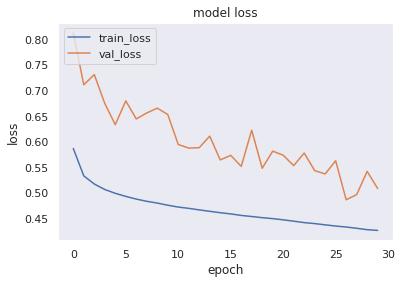

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.grid()

### Plot of Model Accuracy on Train and Validation Datasets

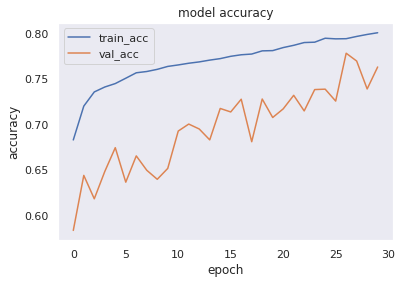

In [ ]:
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.grid()

Text(0.5, 0, 'epoch')

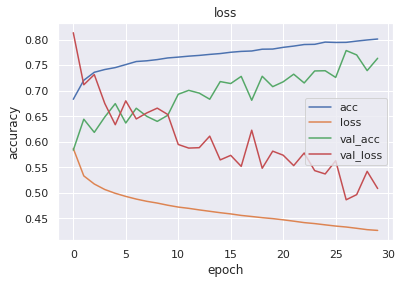

In [ ]:
plt.plot(history.history['accuracy'],label='acc')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.plot(history.history['loss'],label='loss')

plt.plot(history.history['val_accuracy'],label='val_acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()


plt.title('loss')
plt.xlabel('epoch')

### Model evaluation results

In [ ]:
test_results = lrmodel.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

4441/4441 [==============================] - 0s 22us/step
Test results - Loss: 0.41802662995532136 - Accuracy: 0.8011708855628967%


In [ ]:
lrmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 536
Trainable params: 536
Non-trainable params: 0
_________________________________________________________________


In [ ]:
probs = lrmodel.predict(x_test)
classes = lrmodel.predict_classes(x_test)

In [ ]:
probs = probs[:, 0]
classes = classes[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, classes)
print('F1 score: %f' % f1)

Accuracy: 0.801171
Precision: 0.405702
Recall: 0.520394
F1 score: 0.455946


In [ ]:
# ROC AUC
auc = roc_auc_score(y_test, probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, classes)
print(matrix)

ROC AUC: 0.795609
[[3188  542]
 [ 341  370]]


### Confusion Matrix

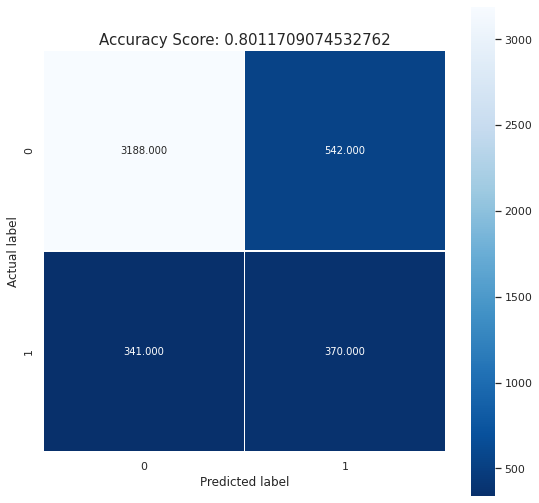

In [ ]:
cm = matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

### ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, probs)
precision, recall, _ = metrics.precision_recall_curve(y_test, probs)

Text(0.5, 1.0, 'ROC Curve, AUC = 0.796')

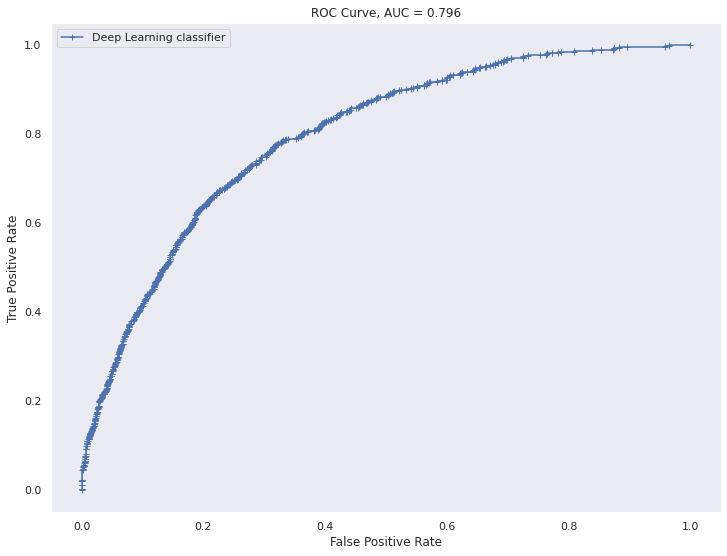

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(fpr_keras, tpr_keras, marker='+', label='Deep Learning classifier')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {auc:.3f}')

### Precision Recall Curve

Text(0.5, 1.0, 'Precision-Recall curve')

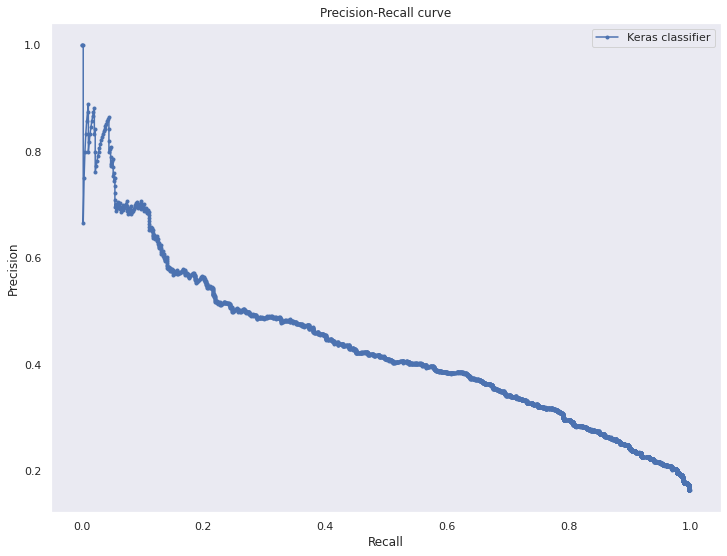

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(recall, precision, marker='.', label='Keras classifier')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

### Plotting the Keras model

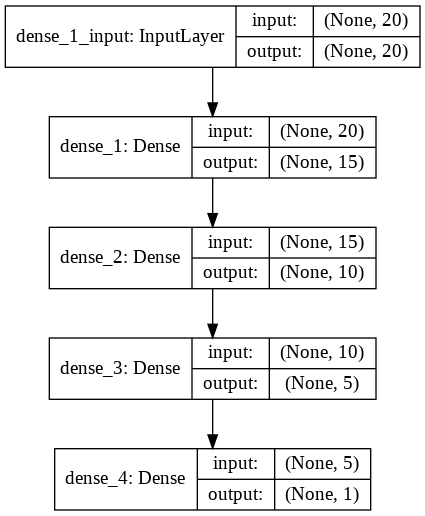

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(lrmodel, to_file='model.png', show_shapes=True)

### Interpretation of model

### Installing shap package

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 276kB 7.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394111 sha256=ccb4368d1b4bf3acc765c0597f222ab3baba311444e0be23df80d639f05c432a
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


### Summarizing the training set

### Shap explainer used here will be DeepExplainer
#### Instantiate an explainer with the model predictions and training data summary

In [ ]:
x_train_summary = shap.kmeans(x_train,20)

In [ ]:
explainer = shap.KernelExplainer(lrmodel.predict_proba,x_train_summary)

In [ ]:
shap_values = explainer.shap_values(x_test)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [ ]:
feature_cols = ['age','height','weight','eyes','motor','verbal','GCSTotal','temperature','respiratoryrate','heartrate','glucose','O2','fio2','ph','los','SBP','DBP','MAP','ethnicity','gender']


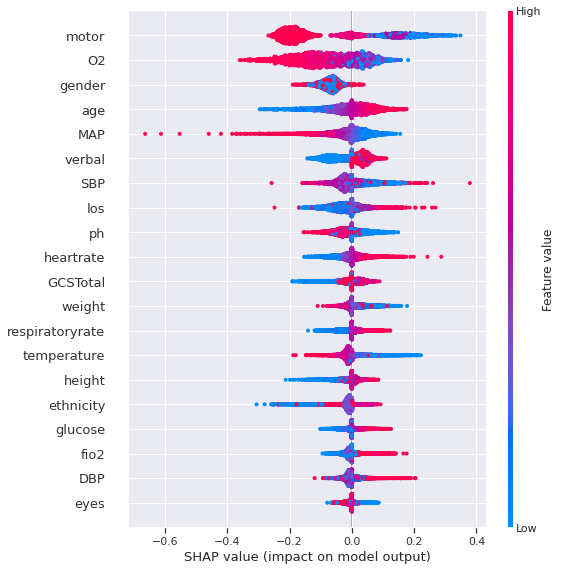

In [ ]:
shap.summary_plot(shap_values[0], x_test,feature_names=feature_cols)

In [ ]:
shap.dependence_plot("motor", shap_values, x_test)

TypeError: ignored